<a href="https://colab.research.google.com/github/dsadasafd/GAN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import random
import pandas
import matplotlib.pyplot as plt

In [ ]:
# check cuda is available

if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print('using cuda:', torch.cuda.get_device_name(0))
  pass

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

using cuda: Tesla T4


device(type='cuda')

In [ ]:
b = torch.tensor(3.5)
b.device


device(type='cuda', index=0)

In [ ]:
def generate_real():
    real_data = torch.cuda.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

In [ ]:
a = generate_real()
a.device

device(type='cuda', index=0)

In [ ]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()
    pass

    # 定义神经网络层
    self.model = nn.Sequential(
        nn.Linear(4, 3),
        nn.Sigmoid(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )
    pass

    # 创建损失函数
    self.loss_function = nn.MSELoss()

    # 创建优化器，使用随机梯度下降
    self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)

    # 计算器和进程记录
    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs, targets)

    # 记录训练次数

    self.counter +=1
    if (self.counter % 10 ==0):
      self.progress.append(loss.item())
      pass
    if (self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    # 反向传播优化权重
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

In [ ]:
# 创建一个随机生成噪声的函数
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

generate_random(4).device

device(type='cuda', index=0)

In [ ]:
size = 4
D = Discriminator()

for i in range(10000):
  # 真实数据
  D.train(generate_real(), torch.cuda.FloatTensor([1.0]))

  # 随机数据
  D.train(generate_random(size), torch.cuda.FloatTensor([0.0]))
  pass


counter =  10000
counter =  20000


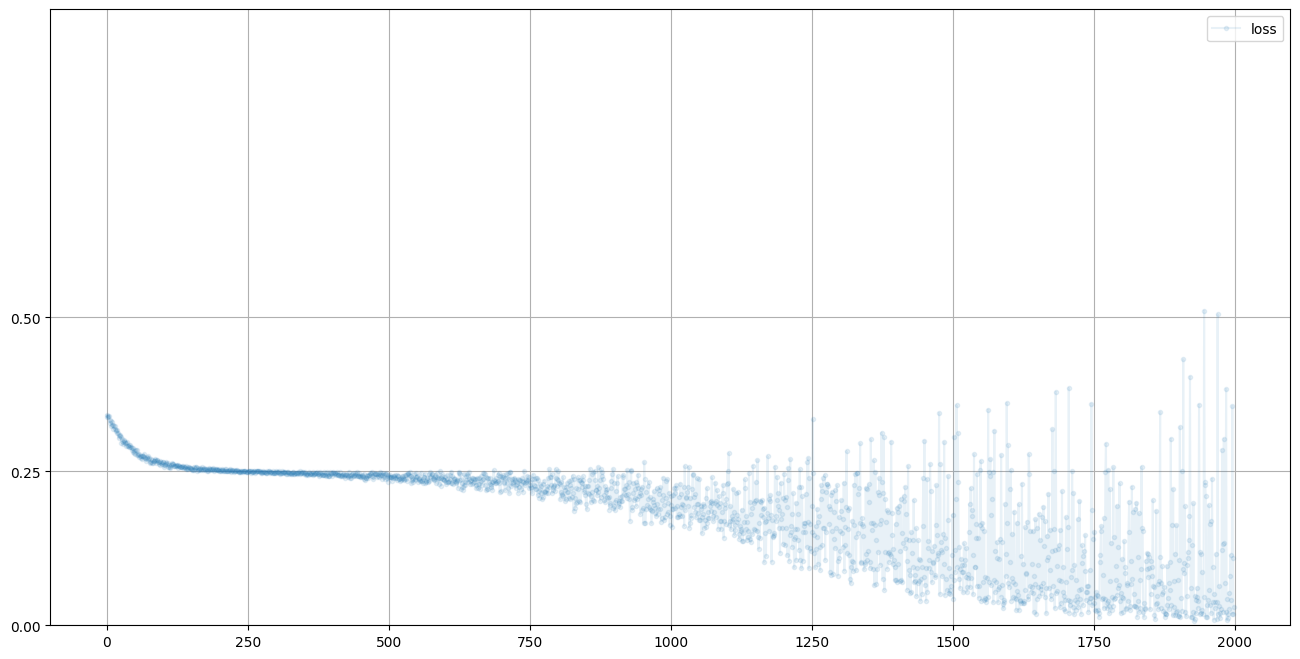

In [ ]:
D.plot_progress()

In [ ]:
print(D.forward(generate_real()))
print(D.forward(generate_random(size)))

tensor([0.6920], grad_fn=<SigmoidBackward0>)
tensor([0.1054], grad_fn=<SigmoidBackward0>)


In [ ]:
# 构建生成器
class Generator(nn.Module):

  def __init__(self):
    super().__init__()
    pass

    # 定义神经网络层
    self.model = nn.Sequential(
        nn.Linear(1, 3),
        nn.Sigmoid(),
        nn.Linear(3, 4),
        nn.Sigmoid()
    )
    pass

    # 创建损失函数
    # self.loss_function = nn.MSELoss()

    # 创建优化器，使用随机梯度下降
    self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)

    # 计算器和进程记录
    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, D, inputs, targets):
    # 计算网络输出
    g_output = self.forward(inputs)

    # 输入鉴别器
    d_output = D.forward(g_output)

    # 计算损失值
    loss = D.loss_function(d_output, targets)

    self.counter += 1
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    # 梯度归零，反向传播，并更新权重
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass


  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

pass


In [ ]:
G = Generator()
G.forward(torch.cuda.FloatTensor([0.5]))

tensor([0.3478, 0.4959, 0.5784, 0.6271], grad_fn=<SigmoidBackward0>)

In [ ]:
%%time

# 创建训练用的鉴别器和生成器

D = Discriminator()
G = Generator()

image_datalist = []

# 训练它们

for i in range(10000):

  # 真实数据
  D.train(generate_real(), torch.cuda.FloatTensor([1.0]))

  # 生成数据
  D.train(G.forward(torch.cuda.FloatTensor([0.5]).detach()), torch.cuda.FloatTensor([0.0]))

  # 训练生成器
  G.train(D, torch.cuda.FloatTensor([0.5]), torch.cuda.FloatTensor([1.0]))
  
  if (i % 1000 == 0):
    image_datalist.append(G.forward(torch.cuda.FloatTensor([0.5])).detach().cpu().numpy())

  pass



counter =  10000
counter =  20000
CPU times: user 33.1 s, sys: 934 ms, total: 34 s
Wall time: 35.1 s


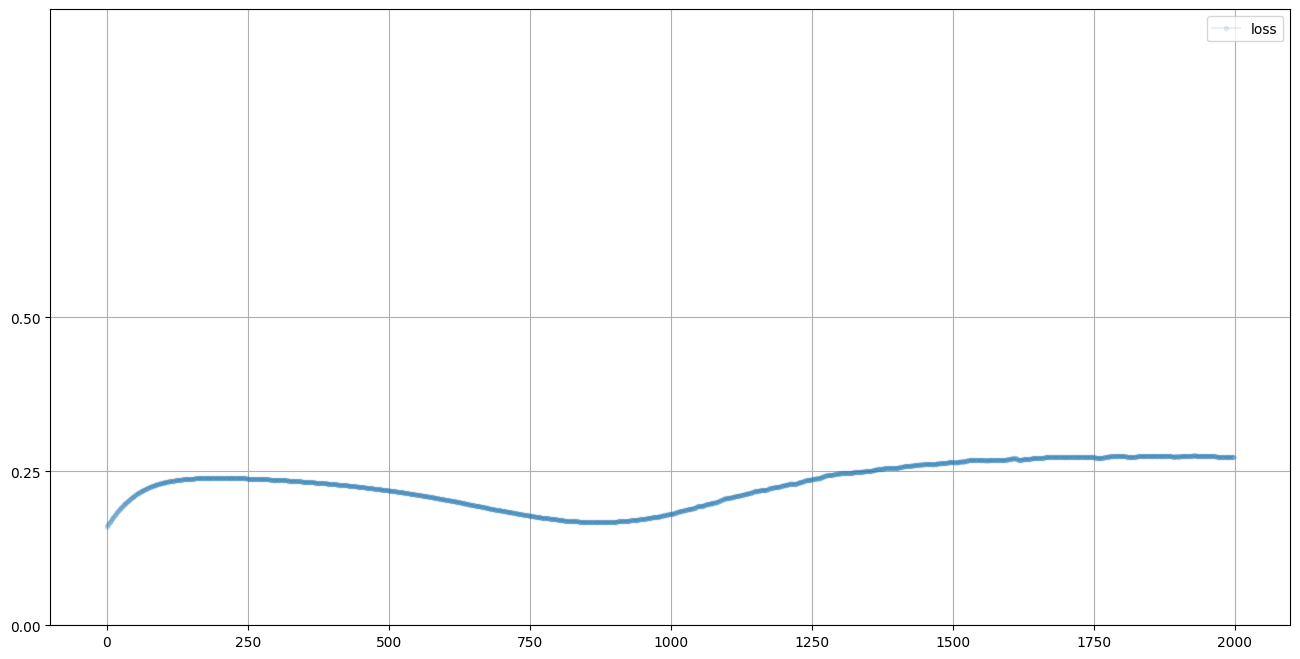

In [ ]:
D.plot_progress()

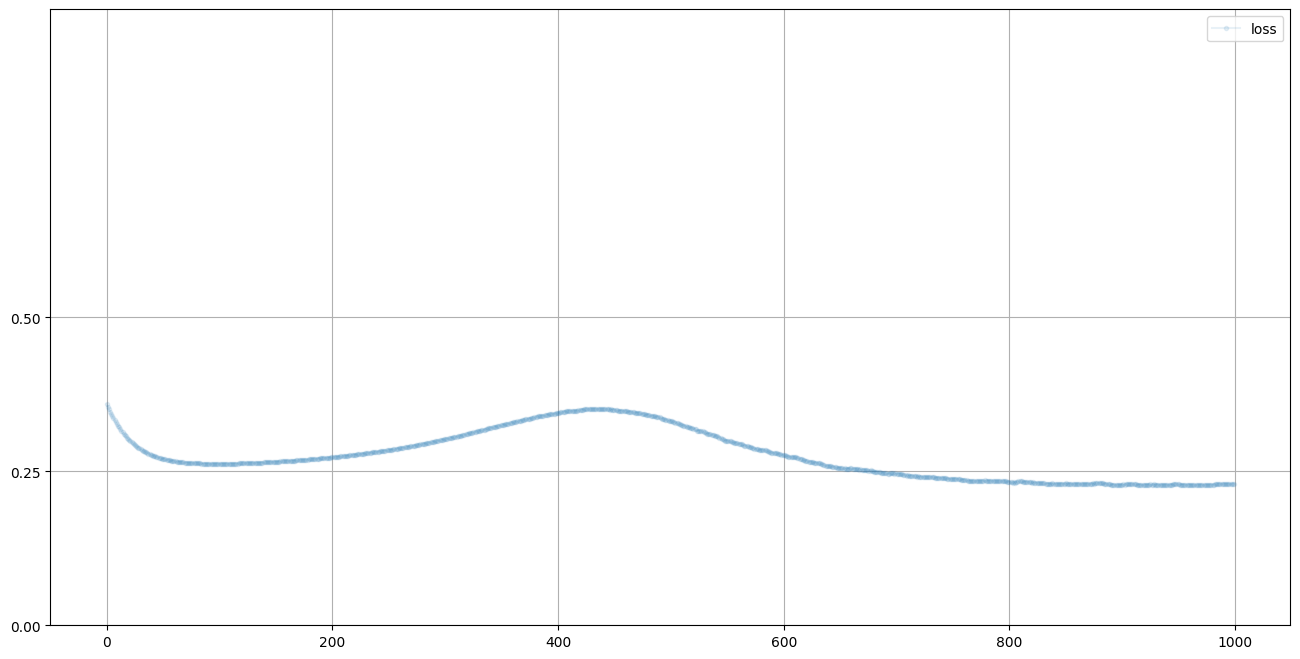

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.cuda.FloatTensor([0.5]))

tensor([0.9278, 0.0362, 0.9471, 0.0363], grad_fn=<SigmoidBackward0>)

In [ ]:
print(image_datalist)

[array([0.549888  , 0.7159704 , 0.35604197, 0.64317816], dtype=float32), array([0.54632276, 0.7186015 , 0.34481812, 0.6283592 ], dtype=float32), array([0.5489129 , 0.7137589 , 0.34215045, 0.60298526], dtype=float32), array([0.56571513, 0.6901669 , 0.35676792, 0.5441047 ], dtype=float32), array([0.6165278 , 0.6039722 , 0.42331204, 0.41023114], dtype=float32), array([0.7071925 , 0.37412187, 0.5935708 , 0.22832462], dtype=float32), array([0.79657173, 0.16401583, 0.778894  , 0.11949893], dtype=float32), array([0.85529506, 0.08713087, 0.87177837, 0.07407489], dtype=float32), array([0.8910317 , 0.05768002, 0.9135121 , 0.05339201], dtype=float32), array([0.913345  , 0.04373613, 0.934855  , 0.04255264], dtype=float32)]


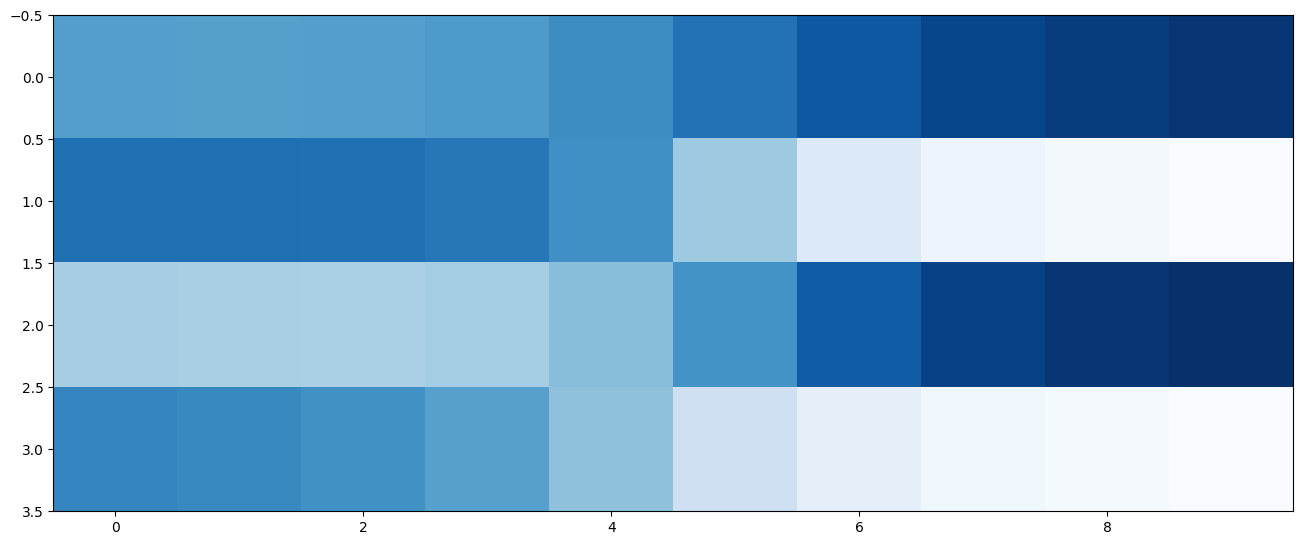

In [ ]:
plt.figure(figsize = (16,8))
plt.imshow(np.array(image_datalist).T, interpolation='none', cmap='Blues')